In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
from sklearn.neural_network import MLPRegressor
%matplotlib inline

In [66]:
def sigmoid(power):
    return 1 / (np.exp(-power) + 1)

np.random.seed(1234)


In [261]:
def gen_sample(size):
    Z = np.random.standard_normal(size)
    X = np.random.standard_normal([size, 2])
    a_1 = np.mat([2, 2])
    a_2 = np.array([3, -3])
    term_1 = sigmoid(np.dot(X, np.transpose(a_1)))
    term_2 = (np.dot(X, np.transpose(a_2))) ** 2
    term_3 = 0.3 * Z
    term_1 = np.array(term_1)
    term_1 = np.squeeze(term_1)
    Y = term_1 + term_2 + term_3
    return X, Y

def model(input):
    a_1 = np.mat([2, 2])
    a_2 = np.array([3, -3])
    term_1 = sigmoid(np.dot(input, np.transpose(a_1)))
    term_2 = (np.dot(input, np.transpose(a_2))) ** 2
    return term_1 + term_2

In [262]:
train_x, train_y = gen_sample(1000)
test_x, test_y = gen_sample(1000)

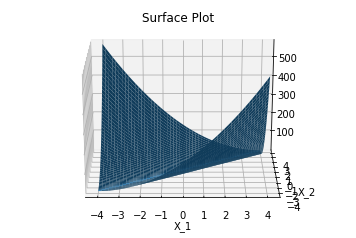

In [263]:
# surface
train_y_no_error = model(train_x)
values = np.linspace(start=-4, stop=4, num=200)
fig = plt.figure()
ax = plt.axes(projection='3d')
xdata = values
ydata = values
X, Y = np.meshgrid(xdata, ydata)
ax.view_init(20, 270)
zs = np.array([model(np.array([x, y])) for x,y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)
ax.plot_surface(X, Y, Z)
ax.set_title('Surface Plot')
ax.set_xlabel('X_1')
ax.set_ylabel('X_2')
fig.savefig('3dplot.png')

In [325]:
def nn_model_k(numofnode):
    nn_model = MLPRegressor(hidden_layer_sizes=(numofnode),
                            activation='relu',
                            solver='adam',
                            learning_rate='adaptive',
                            max_iter=5000,
                            learning_rate_init=0.01,
                            alpha=0.01)
    return nn_model

In [326]:
model_list = []
for i in range(2, 11):
    model = nn_model_k(i)
    model_list.append(model)

In [327]:
loss_list = []
for i in model_list:
    i.fit(train_x, train_y)
    loss_list.append(i.loss_)

In [346]:
test_error_list = []
for i in model_list:
    res = i.predict(test_x)
    se = np.sqrt(np.sum((res - test_y) ** 2))
    test_error_list.append(se)

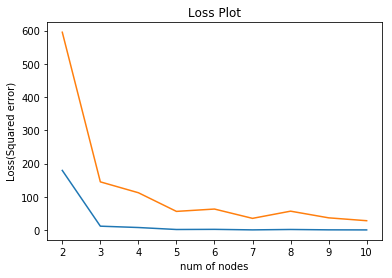

In [350]:
fig_2 = plt.figure()
ax_2 = plt.axes()
ax_2.plot(loss_list)
ax_2.plot(test_error_list)
ax_2.set_title('Loss Plot')
ax_2.set_xlabel('num of nodes')
ax_2.set_ylabel('Loss(Squared error)')
ax_2.set_xticklabels([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
fig_2.savefig('loss_plot.png')

In [353]:
min_node_num = np.argmin(np.array(test_error_list)) + 2

In [356]:
print("the lowest test error is from NN model with {} nodes in the hidden layer.".format(min_node_num))

the lowest test error is from NN model with 10 nodes in the hidden layer.


In [212]:
train_y.shape

(1000, 1000)